In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.integrate import trapz
%matplotlib inline
from astropy import units
from astropy import constants
constants.N_A.si.value

6.022140857e+23

In [2]:
rc('font', family='Comic Sans MS')

In [32]:
dane = pd.read_csv('bateria_1.txt', sep=r"\s*", skiprows=1, header=None, encoding='utf-8',decimal=',')
dane.columns = ['t[s]','U[V]']
dane

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,t[s],U[V]
0,0.1872,4.0629
1,1.0139,4.0576
2,1.8875,4.0524
3,2.8077,4.0471
4,3.8219,4.0418
5,4.8672,4.0366
6,5.9589,4.0313
7,7.0353,4.0261
8,8.1272,4.0208
9,9.2660,4.0156


In [43]:
I = 59.8e-6 # w A
m = 3.531e-6 # w kgramach
dane['pojemnosc'] = I*dane['t[s]']/m/3600
dane

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,t[s],U[V],pojemnosc,pojemnosc_smooth,problematyczne
1406,26299.6076,2.9998,123.722941,122.623320,False
1405,26286.2857,3.0029,123.660270,122.530425,False
1404,26266.2716,3.0060,123.566116,122.436272,False
1403,26246.2574,3.0094,123.471962,122.342118,False
1402,26226.2433,3.0131,123.377808,122.247964,False
1401,26206.2293,3.0165,123.283655,122.153810,False
1400,26186.2153,3.0196,123.189502,122.059657,False
1399,26166.2011,3.0227,123.095348,121.965503,False
1398,26146.1870,3.0261,123.001194,121.871349,False
1397,26126.1728,3.0292,122.907040,121.777195,False


In [35]:
dane['pojemnosc_smooth'] = pd.rolling_mean(dane['pojemnosc'], 25)
dane.dropna(inplace=True)
# dane.sort_values('U[V]', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  """Entry point for launching an IPython kernel.


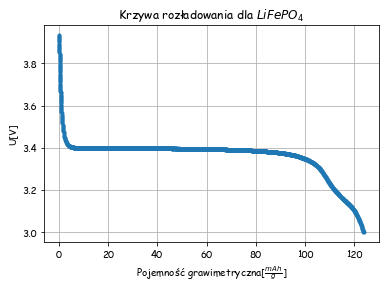

In [36]:
plt.plot(dane['pojemnosc'],dane['U[V]'],'.')
# plt.plot(dane['pojemnosc_smooth'],dane['U[V]'],'--')
plt.grid()
plt.xlabel(r'Pojemność grawimetryczna[$\frac{mAh}{g}$]')
plt.ylabel('U[V]')
plt.title(r'Krzywa rozładowania dla $LiFePO_4$')
plt.savefig('Krzywa_rozladowania.png',dpi=400)

In [37]:
#Pojemność grawimetryczna
pojemnosc_doswiadczalna = dane['pojemnosc'].max()*1e-3
e = constants.e.value
N_A = constants.N_A.value
M_Li = 6.941 
M_Fe = 55.845
M_O = 15.999
M_P = 30.973762
M = M_Li + M_Fe + M_P + 4*M_O
Q = N_A*e/M
pojemnosc_teoretyczna = Q/3600
print('Pojemność:')
print(f'-doświadczalna = {pojemnosc_doswiadczalna}')
print(f'-teoretyczna   = {pojemnosc_teoretyczna}')
print(f'{pojemnosc_doswiadczalna/pojemnosc_teoretyczna*100:.2f}%')

Pojemność:
-doświadczalna = 0.12372294081626228
-teoretyczna   = 0.16989224999749714
72.82%


In [38]:
dane['problematyczne'] = np.gradient(dane['U[V]']) == 0
dane['problematyczne'].value_counts()

False    903
True     480
Name: problematyczne, dtype: int64

In [39]:
dane.sort_values('U[V]', inplace=True)

In [40]:
dane = dane.loc[dane['problematyczne'] == False]

In [41]:
# smooth2 = pd.rolling_mean(dane['pojemnosc'], 25)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1772: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1772: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Pr

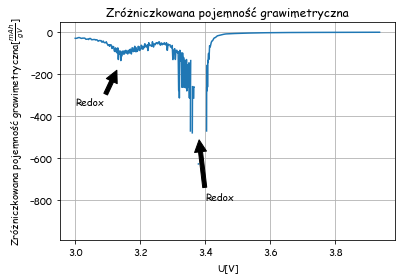

In [46]:
# rozniczka_bez_szumu = np.polyval(np.polyfit(U, pochodna, 7), U)
# plt.plot(dane['U[V]'],np.gradient(dane['pojemnosc'], dane['U[V]']), alpha=1)
plt.plot(dane['U[V]'],np.gradient(dane['pojemnosc_smooth'], dane['U[V]']), alpha=1)
# plt.plot(dane['U[V]'],np.gradient(smooth2, dane['U[V]']), alpha=0.5)
# np.unique(dane['U[V]']).shape
# dane['U[V]'].shape
plt.title('Zróżniczkowana pojemność grawimetryczna')
plt.xlabel('U[V]')
plt.ylabel(r'Zróżniczkowana pojemność grawimetryczna[$\frac{mAh}{gV}$]')
plt.grid()
plt.annotate('Redox',(3.13,-175),xytext=(3,-350),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Redox',(3.38,-500),xytext=(3.4,-800),arrowprops=dict(facecolor='black', shrink=0.05))
# plt.xlim(3.1,3.2)
plt.savefig('rozniczka.png')
plt.show()
# plt.plot(dane['U[V]'],dane['pojemnosc'],label='dane')
# plt.savefig('odwrocony.png')